In [1]:
!pip3 install vaderSentiment

     |████████████████████████████████| 133kB 3.5MB/s 


In [2]:
import gc
import numpy as np
import pandas as pd
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline,FeatureUnion
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.metrics import plot_roc_curve
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from nltk.cluster import KMeansClusterer,cosine_distance, euclidean_distance
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.regularizers import l2
from keras.layers import Dropout

In [3]:
gc.set_threshold(20,5,5)
gc.collect()

0

In [4]:
stop_words = text.ENGLISH_STOP_WORDS.union(['00', '10', '100', '12', '15', '16', '20', '200', '24', '25',\
       '2nd', '30', '40', '45', '50', '60', '75', '80', '90','!',"''","'m","'s",',','.','...','He','I','It','My','Of','``',\
        '!',"''","'m","'re","'s",',','-','.','...','9','An','Ca','Do','I','It','S.','``','!',"''","'s",'(',')',',','-','.',\
        'b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y','&',"'ll",'-D','5',':','?',\
        "'", '0', '1', '2', '3', '4', '6', '7', '8', 'A', 'C', 'D', 'H', 'M', 'O', 'S', '`','#',"'ve",'*','--','..','....','10/10','4/5',';',\
        'As','At','HE','IS','IT','If','In','MY','No','ON','On','PR','SO','So','St','To','US','We','/', 'E', 'N', 'P', 'R', 'T', 'U', 'W', 'Y',\
        '$','%',"'S","'d",'.....','1/2','1/3','105','12-lead','125','14','150','198','1\\23\\18','22','221','27','3-3.5','35','AM','Be','By',\
        'CK','DJ','De','Dr','HM','JE','K.','L','MB','Mr','Ms','R.','TO','W.','YA','B', 'J', 'K', '\\','@','Im','Me','Is'])

In [5]:
vectorized_train_data=pd.read_csv('/content/drive/My Drive/amazon_reviews_project/vectorized_train_data.csv')

In [6]:
vectorized_train_data.head(2)

,<,>,OK,Oh,abil,abl,about.,absolut,absolut love,absolut love thi,abus,accept,access,account,accur,act,action,action.,activ,actual,ad,add,addict,addit,admit,ador,adult,advanc,adventur,advertis,advic,again.,age,ago,ago.,agre,all.,allow,alon,alpha,...,wish,wish wa,wit,witti,wo,wo n't,woman,women,wonder,wonder book,wonder stori,word,work,work.,world,world.,worst,worth,worth read,wow,wrap,write,write style,write thi,writer,writer.,writing.,written,written book,written.,wrong,wrote,ye,year,year ago,year old,years.,you.,young,younger
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.464864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
X_train=vectorized_train_data
y_train=pd.read_csv('/content/drive/My Drive/amazon_reviews_project/y_train')

Let's take a look at how the ratings are distributed.

In [8]:
y_train.value_counts(normalize=True)

overall
5          0.692554
4          0.173170
3          0.067026
1          0.036020
2          0.031230
dtype: float64

So guessing a rating of 5 will be accurate ~69% of the time. This is our null model.

In [9]:
y_train_categorical=tf.keras.utils.to_categorical(y_train)[:,1:]  #dropping first column
y_train_categorical[:4]

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [10]:
model=Sequential([
    layers.Input(shape=(1500, )),
    layers.BatchNormalization(),
    layers.Dense(4500,activation='relu',kernel_regularizer=l2(0)),
    layers.Dense(2000,activation='relu',kernel_regularizer=l2(0)),,
    layers.Dense(1250,activation='relu',kernel_regularizer=l2(0)),
    layers.Dense(250,activation='relu',kernel_regularizer=l2(0)),
    layers.Dense(50,activation='relu',kernel_regularizer=l2(0)),
    layers.Dense(5,activation='softmax')
])
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [11]:

history=model.fit(X_train,y_train_categorical,epochs=20,batch_size=2_500,validation_split=0.2)

Epoch 1/20
160/160 [==============================] - 49s 305ms/step - loss: 0.8220 - accuracy: 0.6966 - val_loss: 1.2757 - val_accuracy: 0.7072
Epoch 2/20
160/160 [==============================] - 46s 290ms/step - loss: 0.7313 - accuracy: 0.7242 - val_loss: 1.2932 - val_accuracy: 0.6809
Epoch 3/20
160/160 [==============================] - 46s 290ms/step - loss: 0.6862 - accuracy: 0.7389 - val_loss: 1.2186 - val_accuracy: 0.6149
Epoch 4/20
160/160 [==============================] - 47s 294ms/step - loss: 0.5987 - accuracy: 0.7728 - val_loss: 0.8743 - val_accuracy: 0.6820
Epoch 5/20
160/160 [==============================] - 46s 285ms/step - loss: 0.4554 - accuracy: 0.8297 - val_loss: 0.8795 - val_accuracy: 0.6939
Epoch 6/20
160/160 [==============================] - 46s 286ms/step - loss: 0.3315 - accuracy: 0.8773 - val_loss: 1.0879 - val_accuracy: 0.6827
Epoch 7/20
160/160 [==============================] - 46s 286ms/step - loss: 0.2674 - accuracy: 0.9022 - val_loss: 1.3053 - val_ac

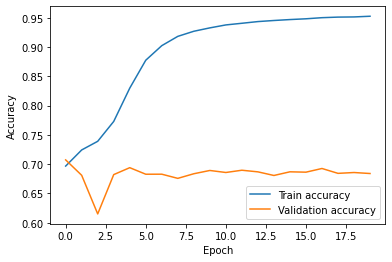

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label='Train accuracy')   #mae on training set
plt.plot(history.history['val_accuracy'],label='Validation accuracy');  #mae on validation set
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy');

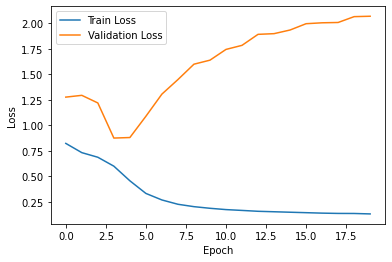

In [13]:
plt.plot(history.history['loss'],label='Train Loss')   #mae on training set
plt.plot(history.history['val_loss'],label='Validation Loss');  #mae on validation set
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss');